In [3]:
import cv2
import os
import os.path as osp
from glob import glob

In [4]:
DIR_1 = ["dataset/Screws_2024_07_15"]
DIR_2 = ["dataset/ScrewAndBolt_20240713"]

In [5]:
im_dirs = DIR_1 + DIR_2

im_paths = [glob(osp.join(x, "**", "*.jpg"), recursive=True) for x in im_dirs]
im_paths = sorted([path for im_path in im_paths for path in im_path])
im_paths

['dataset/ScrewAndBolt_20240713/20240713_192951.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193135.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193650.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193659.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193831.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193839.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_193907.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194200.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194206.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194215.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194232.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194256.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194316.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194541.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194551.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194606.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194621.jpg',
 'dataset/ScrewAndBolt_20240713/20240713_194630.jpg',
 'dataset/Screws_2024_07_15/

In [6]:
im_path = im_paths[0]

In [7]:
import matplotlib.pyplot as plt

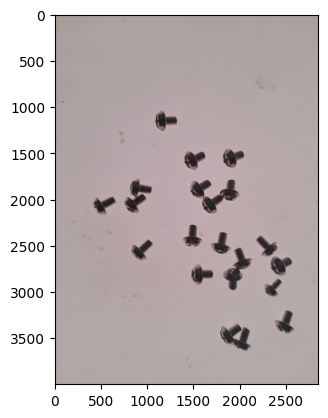

In [24]:
%matplotlib inline
im = plt.imread(im_path)
plt.imshow(im)
# plt.axis("off")
plt.show()

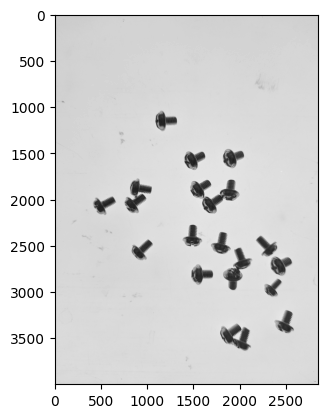

(4000, 2848)

In [25]:
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(im, cmap="gray")
# plt.axis("off")
plt.show()
im.shape

## Histogram

In [27]:
import numpy as np

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.        ,  13.42105263,  26.84210526,  40.26315789,
         53.68421053,  67.10526316,  80.52631579,  93.94736842,
        107.36842105, 120.78947368, 134.21052632, 147.63157895,
        161.05263158, 174.47368421, 187.89473684, 201.31578947,
        214.73684211, 228.15789474, 241.57894737, 255.        ]),
 <a list of 2848 BarContainer objects>)

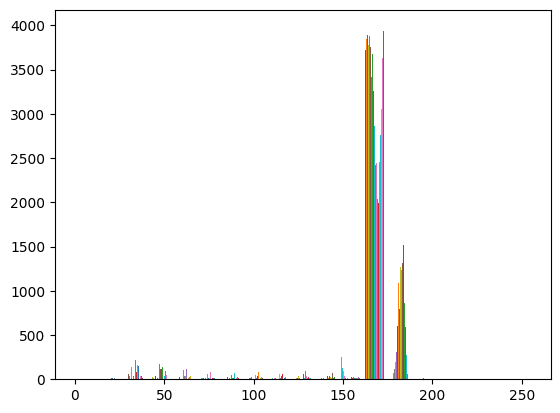

In [32]:
x = np.linspace(0, 255, 20)
plt.hist(im, x)
plt.show()

In [37]:
hist, bins = np.histogram(im.flatten(), bins=256)

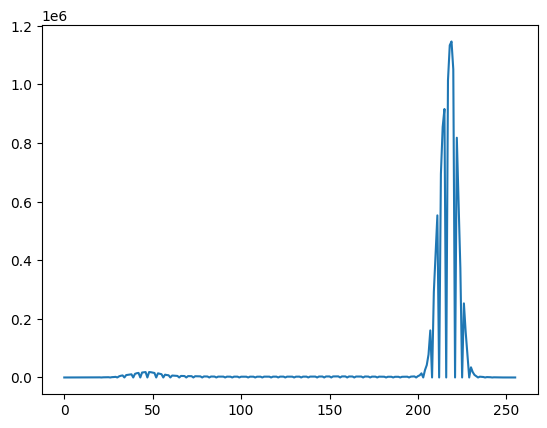

In [38]:
plt.plot(hist)

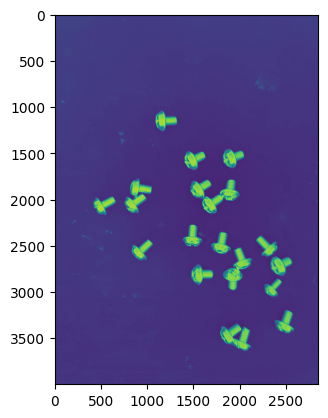

In [40]:
inverted_im = cv2.bitwise_not(im)
plt.imshow(inverted_im)
plt.show()

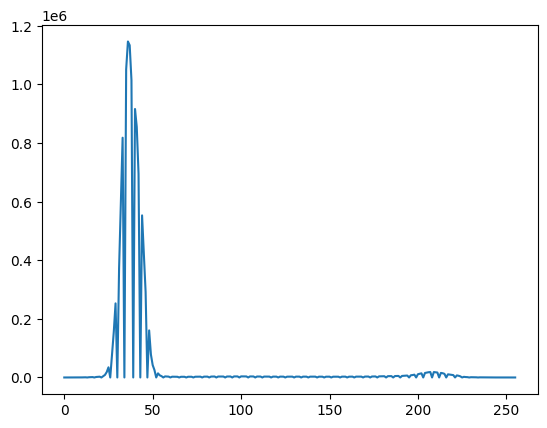

In [43]:
hist, bins = np.histogram(inverted_im.flatten(), bins=256)
plt.plot(hist)
plt.show()

In [97]:
_, new_im = cv2.threshold(im, 60.0, 255.0, cv2.THRESH_BINARY_INV)

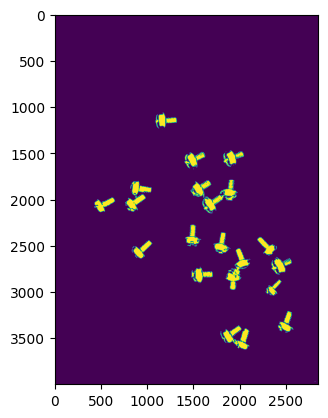

In [98]:
plt.imshow(new_im)
plt.show()

In [132]:
contours, _ = cv2.findContours(new_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [203]:
img_with_boxes = new_im.copy()
no_of_boxes = len(contours)
widths, heights = [], []
contour_taken = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    widths.append(w)
    heights.append(h)
    if w > 80 and h > 80:
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255), 2)  # Green box with thickness of 2
        contour_taken.append(contour)

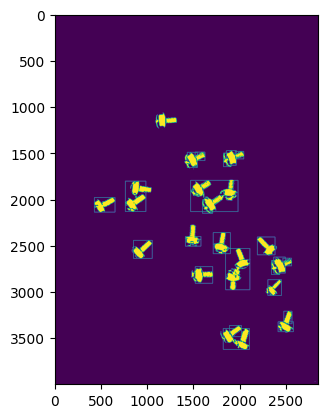

In [204]:
plt.imshow(img_with_boxes)
plt.show()

In [205]:
no_of_boxes

252

In [206]:
width_hist, _= np.histogram(widths, bins=20)

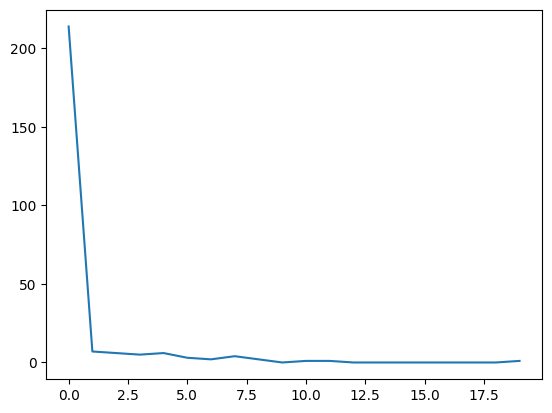

In [207]:
plt.plot(width_hist)
plt.show()

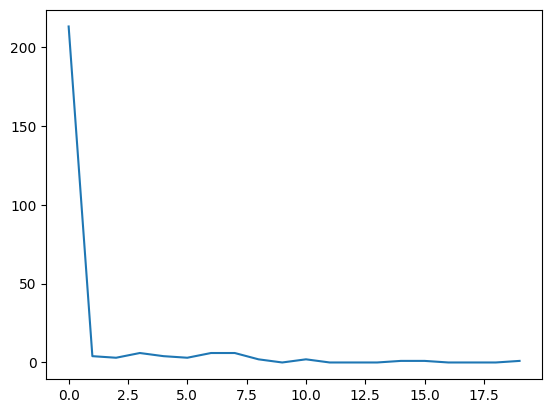

In [208]:
height_hist, _= np.histogram(heights, bins=20)
plt.plot(height_hist)
plt.show()

In [209]:
len(contour_taken)

23